In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time

RAW_DATA_PATH = r"../data/raw"
PROCESSED_DATA_PATH = r"../data/processed/daily_data"

In [2]:
daily_files = [
    'daily_confirmed_cases.csv',
    'daily_deaths_cases.csv',
    'daily_recovered_cases.csv'
]

In [3]:
daily_data = {}
for file in daily_files:
    df = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, file))
    key = file.replace("daily_", "").replace("_cases.csv", "")
    daily_data[key] = df
    print(f"{key}: {df.shape}")

confirmed: (193, 497)
deaths: (193, 497)
recovered: (193, 497)


In [4]:
confirmed_df = daily_data.get("confirmed")
deaths_df = daily_data.get("deaths")
recovered_df = daily_data.get("recovered")

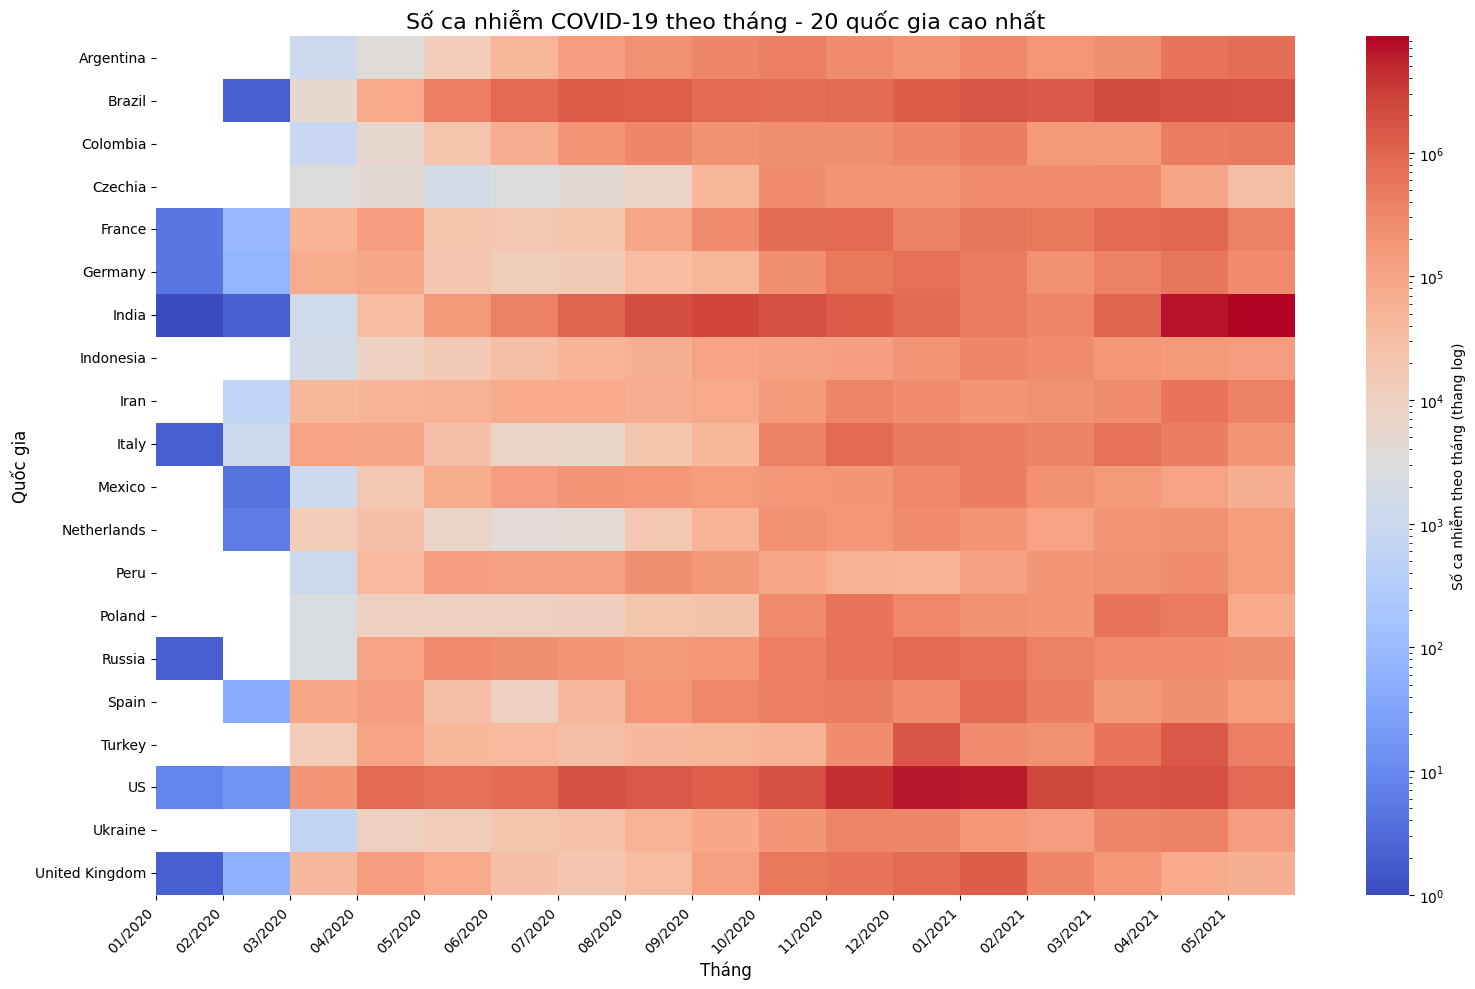

In [5]:
confirmed_df['Total'] = confirmed_df.iloc[:, 3:].sum(axis=1)
top_countries = confirmed_df.nlargest(20, 'Total')['Country/Region'].tolist()

# Lọc dữ liệu chỉ lấy 50 nước có số ca cao nhất
confirmed_df_top = confirmed_df[confirmed_df['Country/Region'].isin(top_countries)]

# Chuyển dữ liệu sang dạng dài (long format)
confirmed_df_melt = confirmed_df_top.melt(id_vars=['Country/Region'], 
                      value_vars=confirmed_df.columns[3:-1], 
                      var_name='Date', 
                      value_name='Cases')

# Chuyển cột Date sang kiểu datetime
confirmed_df_melt['Date'] = pd.to_datetime(confirmed_df_melt['Date'], format='%m/%d/%y')

# Nhóm dữ liệu theo tháng
confirmed_df_melt['Month'] = confirmed_df_melt['Date'].dt.to_period('M').dt.to_timestamp()
confirmed_df_monthly = confirmed_df_melt.groupby(['Country/Region', 'Month'])['Cases'].sum().reset_index()

# Tạo bảng pivot để vẽ heatmap
heatmap_data = confirmed_df_monthly.pivot(index='Country/Region', 
                               columns='Month', 
                               values='Cases')

# Vẽ heatmap với màu 'coolwarm'
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_data, 
                cmap='coolwarm',
                norm=LogNorm(),
                cbar_kws={'label': 'Số ca nhiễm theo tháng (thang log)'})

# Định dạng lại nhãn trục x
month_labels = [date.strftime('%m/%Y') for date in heatmap_data.columns]
ax.set_xticks(range(len(month_labels)))
ax.set_xticklabels(month_labels, rotation=45, ha='right')

plt.title('Số ca nhiễm COVID-19 theo tháng - 20 quốc gia cao nhất', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.tight_layout()
plt.show()

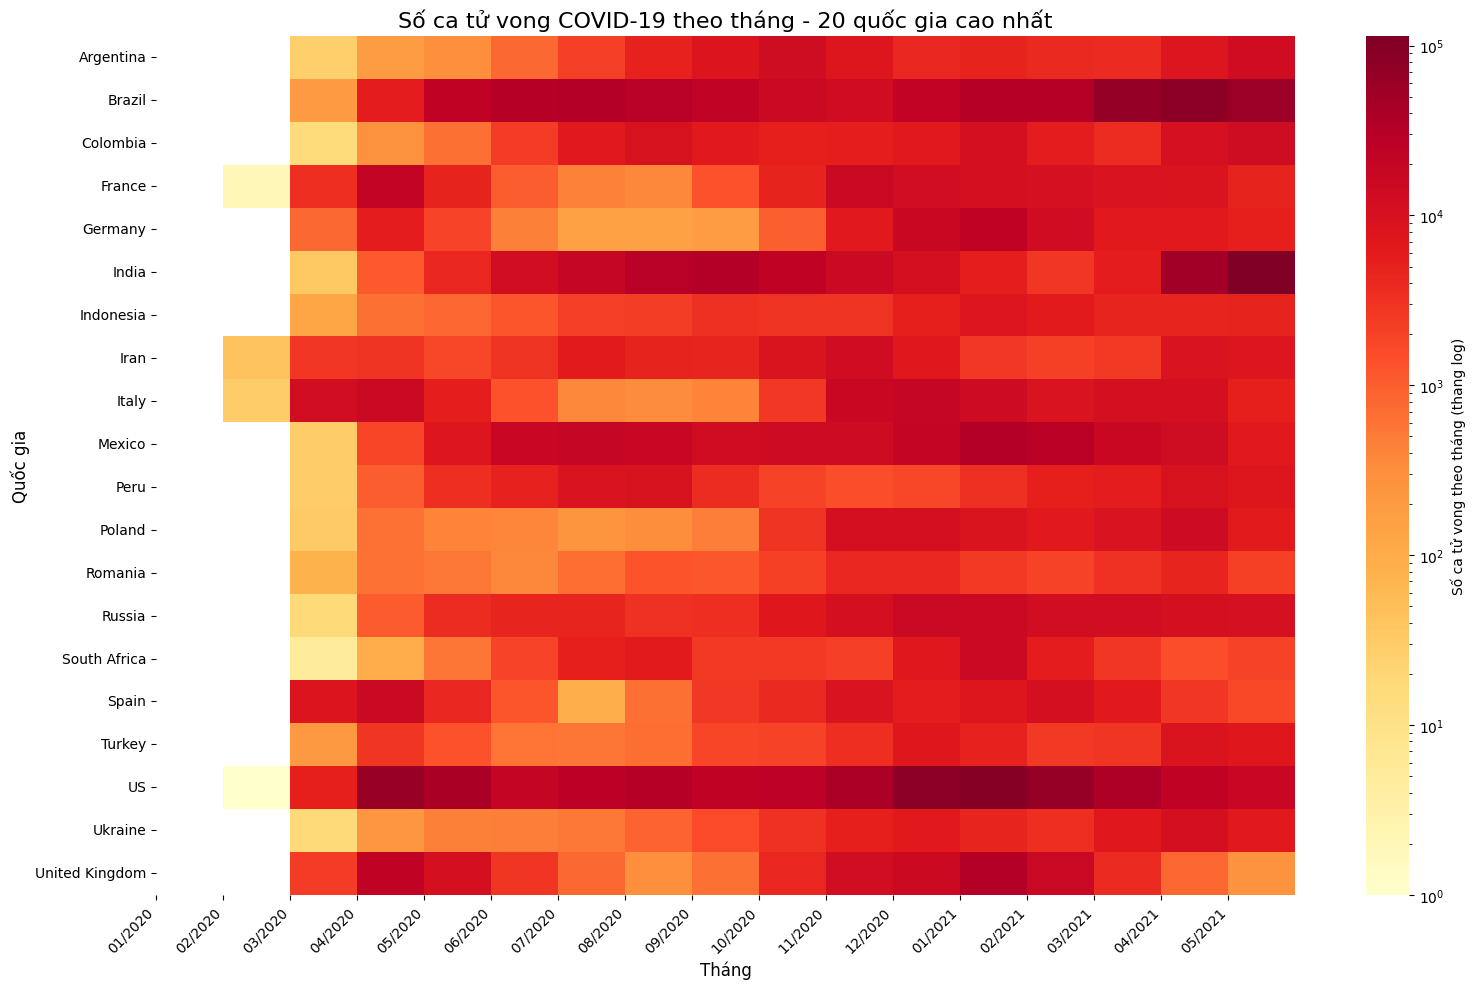

In [6]:
deaths_df['Total'] = deaths_df.iloc[:, 3:].sum(axis=1)
top_countries = deaths_df.nlargest(20, 'Total')['Country/Region'].tolist()

# Lọc dữ liệu chỉ lấy 50 nước có số ca cao nhất
deaths_df_top = deaths_df[deaths_df['Country/Region'].isin(top_countries)]

# Chuyển dữ liệu sang dạng dài (long format)
deaths_df_melt = deaths_df_top.melt(id_vars=['Country/Region'], 
                      value_vars=deaths_df.columns[3:-1], 
                      var_name='Date', 
                      value_name='Cases')

# Chuyển cột Date sang kiểu datetime
deaths_df_melt['Date'] = pd.to_datetime(deaths_df_melt['Date'], format='%m/%d/%y')

# Nhóm dữ liệu theo tháng
deaths_df_melt['Month'] = deaths_df_melt['Date'].dt.to_period('M').dt.to_timestamp()
deaths_df_monthly = deaths_df_melt.groupby(['Country/Region', 'Month'])['Cases'].sum().reset_index()

# Tạo bảng pivot để vẽ heatmap
heatmap_data = deaths_df_monthly.pivot(index='Country/Region', 
                               columns='Month', 
                               values='Cases')

# Vẽ heatmap với màu 'coolwarm'
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_data, 
                cmap='YlOrRd',
                norm=LogNorm(),
                cbar_kws={'label': 'Số ca tử vong theo tháng (thang log)'})

# Định dạng lại nhãn trục x
month_labels = [date.strftime('%m/%Y') for date in heatmap_data.columns]
ax.set_xticks(range(len(month_labels)))
ax.set_xticklabels(month_labels, rotation=45, ha='right')

plt.title('Số ca tử vong COVID-19 theo tháng - 20 quốc gia cao nhất', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.tight_layout()
plt.show()

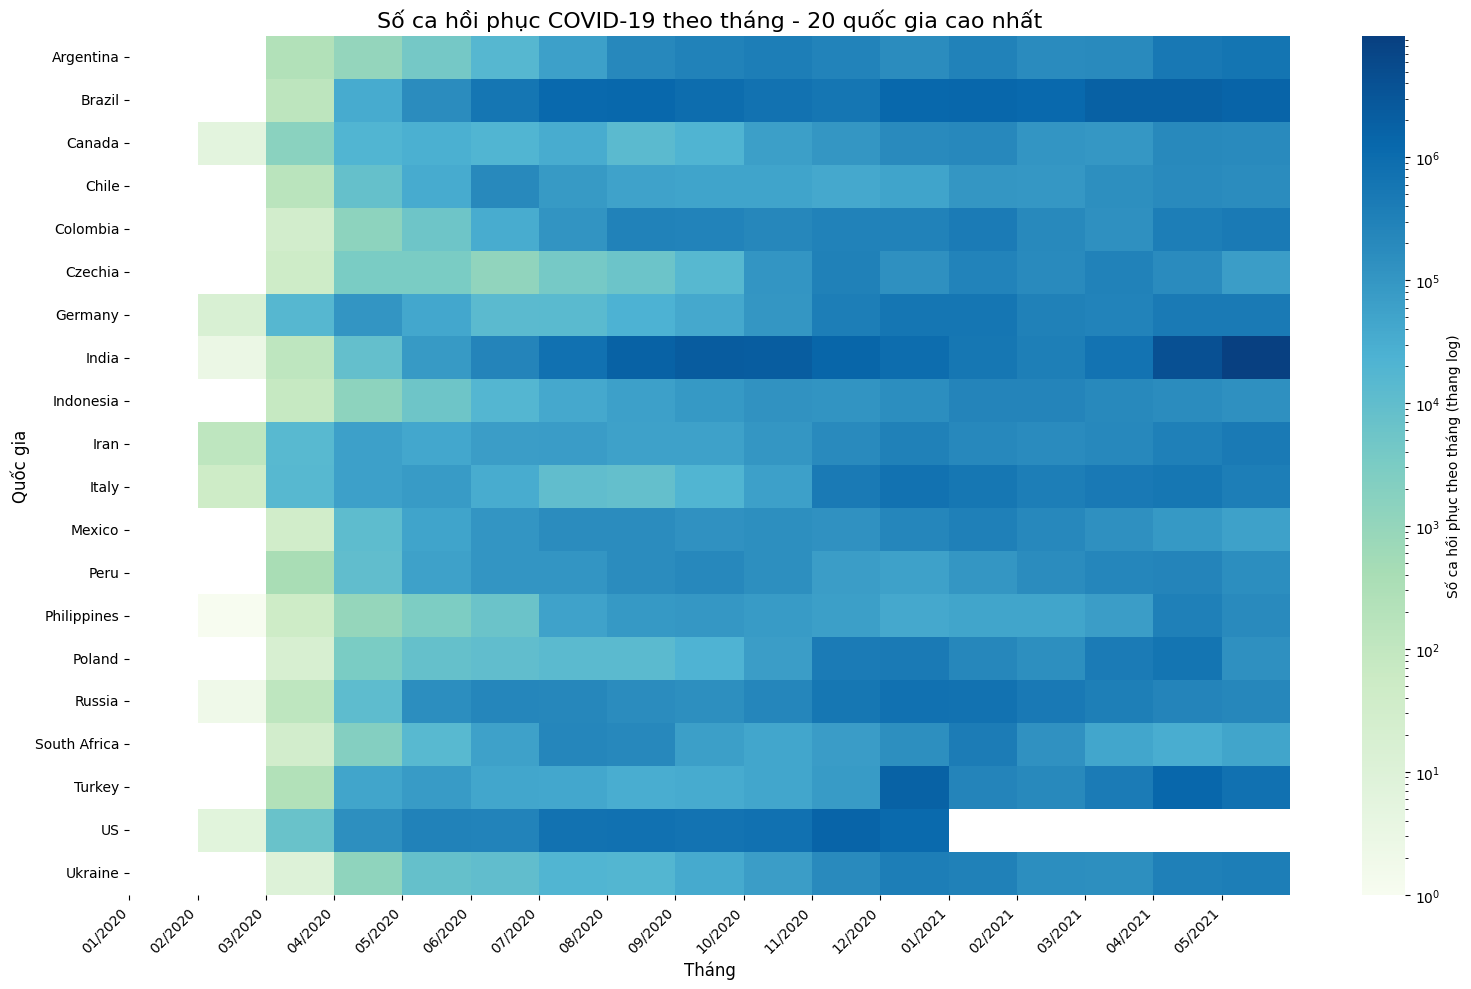

In [7]:
recovered_df['Total'] = recovered_df.iloc[:, 3:].sum(axis=1)
top_countries = recovered_df.nlargest(20, 'Total')['Country/Region'].tolist()

# Lọc dữ liệu chỉ lấy 50 nước có số ca cao nhất
recovered_df_top = recovered_df[recovered_df['Country/Region'].isin(top_countries)]

# Chuyển dữ liệu sang dạng dài (long format)
recovered_df_melt = recovered_df_top.melt(id_vars=['Country/Region'], 
                      value_vars=recovered_df.columns[3:-1], 
                      var_name='Date', 
                      value_name='Cases')

# Chuyển cột Date sang kiểu datetime
recovered_df_melt['Date'] = pd.to_datetime(recovered_df_melt['Date'], format='%m/%d/%y')

# Nhóm dữ liệu theo tháng
recovered_df_melt['Month'] = recovered_df_melt['Date'].dt.to_period('M').dt.to_timestamp()
recovered_df_monthly = recovered_df_melt.groupby(['Country/Region', 'Month'])['Cases'].sum().reset_index()

# Tạo bảng pivot để vẽ heatmap
heatmap_data = recovered_df_monthly.pivot(index='Country/Region', 
                               columns='Month', 
                               values='Cases')

# Vẽ heatmap với màu 'coolwarm'
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_data, 
                cmap='GnBu',
                norm=LogNorm(),
                cbar_kws={'label': 'Số ca hồi phục theo tháng (thang log)'})

# Định dạng lại nhãn trục x
month_labels = [date.strftime('%m/%Y') for date in heatmap_data.columns]
ax.set_xticks(range(len(month_labels)))
ax.set_xticklabels(month_labels, rotation=45, ha='right')

plt.title('Số ca hồi phục COVID-19 theo tháng - 20 quốc gia cao nhất', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.tight_layout()
plt.show()